### startups dataset

In [1]:
#importimg the libraries
import pandas as pd
import numpy as np

In [2]:
#reading the data
startup = pd.read_csv("50_Startups.csv")

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#to know shape of the data
startup.shape

(50, 5)

In [5]:
#describing the data
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
#to know the data types of the column
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
#to check null values
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
# to know duplicated values
startup.duplicated().sum()

0

In [9]:
import seaborn as sns

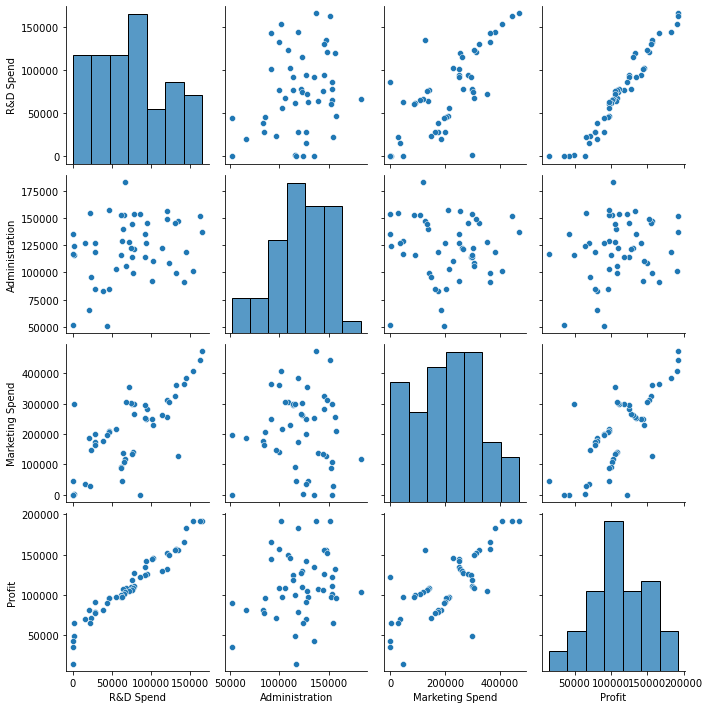

In [10]:
sns.pairplot(startup)

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
#label encoding the data
label = LabelEncoder()
startup["State"]=label.fit_transform(startup["State"])
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [13]:
#rename dataset
startup = startup.rename({'R&D Spend':'RD',
                                 'Administration':'Admin',
                                 'Marketing Spend':'Marketing',
                                 'State':'State',
                                 'Profit':'Profit'},axis=1)

In [14]:
startup.head()

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [15]:
import statsmodels.formula.api as smf

In [16]:
#building a model 
model_1 = smf.ols('Profit~RD+Admin+Marketing+State',data=startup).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           8.51e-29
Time:                        13:50:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD             0.8058      0.046     17.609      0.000       0.714       0.898
Admin         -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing      0.0272      0.017      1.637      0.109      -0.006       0.061
State        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model_admin=smf.ols('Profit~Admin',data=startup).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 11 Jul 2021   Prob (F-statistic):              0.162
Time:                        13:50:28   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model_marketing=smf.ols('Profit~Marketing',data=startup).fit()
model_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           4.38e-10
Time:                        13:50:28   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model_state=smf.ols('Profit~State',data=startup).fit()
model_state.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Sun, 11 Jul 2021   Prob (F-statistic):              0.482
Time:                        13:50:28   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
State       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model_state_mark_admin=smf.ols('Profit~State+Marketing+Admin',data=startup).fit()
model_state_mark_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     24.12
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.58e-09
Time:                        13:50:28   Log-Likelihood:                -577.03
No. Observations:                  50   AIC:                             1162.
Df Residuals:                      46   BIC:                             1170.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.858e+04   1.82e+04      1.019      0.314   -1.81e+04    5.53e+04
State       1971.5065   4461.459      0.442      0.661   -7008.944     1.1e+04
Marketing      0.2478      0.030      8.150      0.000       0.187       0.309
Admin          0.3228      0.132      2.440      0.019       0.057       0.589
==============================================================================
Omnibus:                        6.485   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.530
Skew:                          -0.490   Prob(JB):                       0.0382
Kurtosis:                       4.474   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_2 = smf.ols('Profit~RD+Admin+Marketing',data=startup).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           4.53e-30
Time:                        13:50:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
startup_1=startup.astype(int)
startup_1.head()

,RD,Admin,Marketing,State,Profit
0,165349,136897,471784,2,192261
1,162597,151377,443898,0,191792
2,153441,101145,407934,1,191050
3,144372,118671,383199,2,182901
4,142107,91391,366168,1,166187


In [23]:
# VIF = 1/1-Rsquared

rsqr_rd = smf.ols('RD~State+Admin+Marketing',data=startup).fit().rsquared
vif_rd = 1/(1-rsqr_rd)

rsqr_admin = smf.ols('Admin~State+RD+Marketing',data=startup).fit().rsquared
vif_admin = 1/(1-rsqr_admin)

rsqr_marketing = smf.ols('Marketing~State+RD+Admin',data=startup).fit().rsquared
vif_marketing = 1/(1-rsqr_marketing)

rsqr_state = smf.ols('State~Marketing+RD+Admin',data=startup).fit().rsquared
vif_state = 1/(1-rsqr_state)

In [24]:
vif = {"names":['RD','Admin','Marketing','State'],
      "VIF":[vif_rd,vif_admin,vif_marketing,vif_state]}

data_vif=pd.DataFrame(vif)

In [25]:
data_vif

,names,VIF
0,RD,2.481178
1,Admin,1.175315
2,Marketing,2.326780
3,State,1.011281


In [26]:
#QQplot
import matplotlib.pyplot as plt
import statsmodels.api as sm


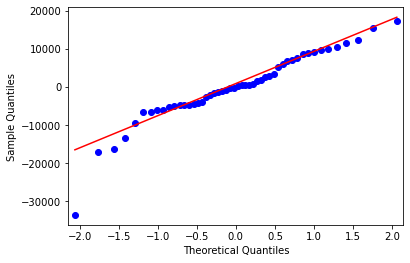

In [27]:
qqplot=sm.qqplot(model_1.resid,line='q')
plt.show()

In [28]:

list(np.where(model_1.resid<-20000))

[array([49], dtype=int64)]

In [29]:
# residual plot for homoscadaticity 

def get_standarddized_values(vals):
    return (vals - vals.mean()/vals.std())

Text(0, 0.5, 'standarddized residuals')

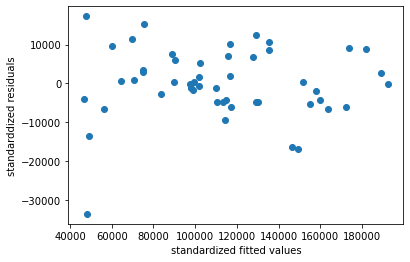

In [30]:
plt.scatter(get_standarddized_values(model_1.fittedvalues),get_standarddized_values(model_1.resid))
plt.xlabel("standardized fitted values")
plt.ylabel("standarddized residuals")

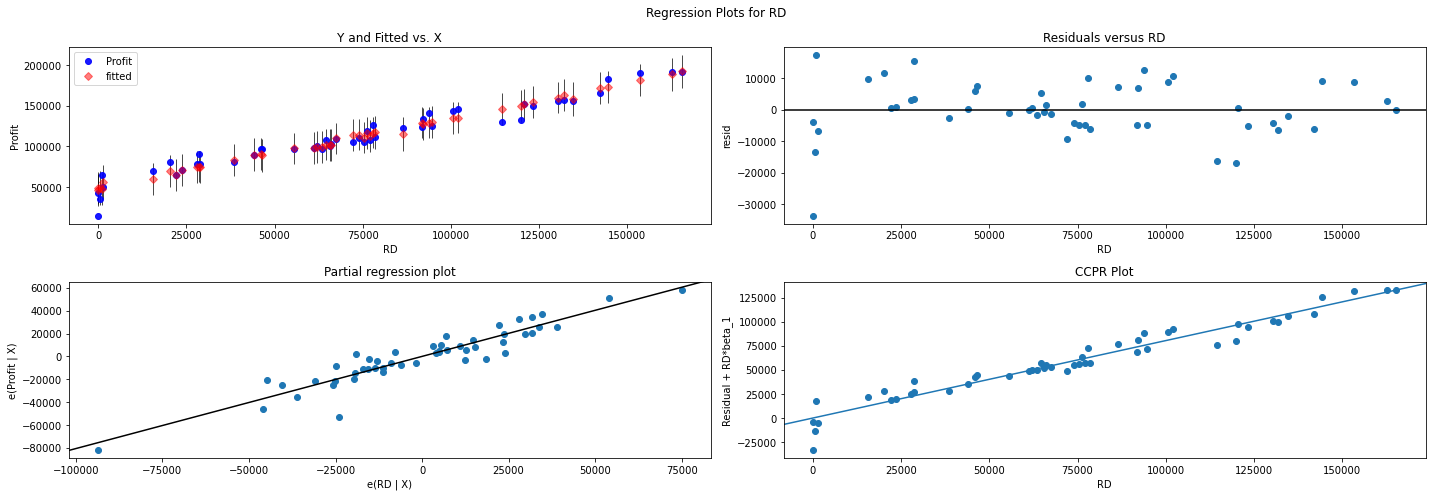

In [31]:
# residual vs regressors

fig = plt.figure(figsize=(20,7))
fig = sm.graphics.plot_regress_exog(model_1,'RD',fig=fig)

In [32]:
#cooks distance

model_influence = model_1.get_influence()
(c,_) = model_influence.cooks_distance

<StemContainer object of 3 artists>

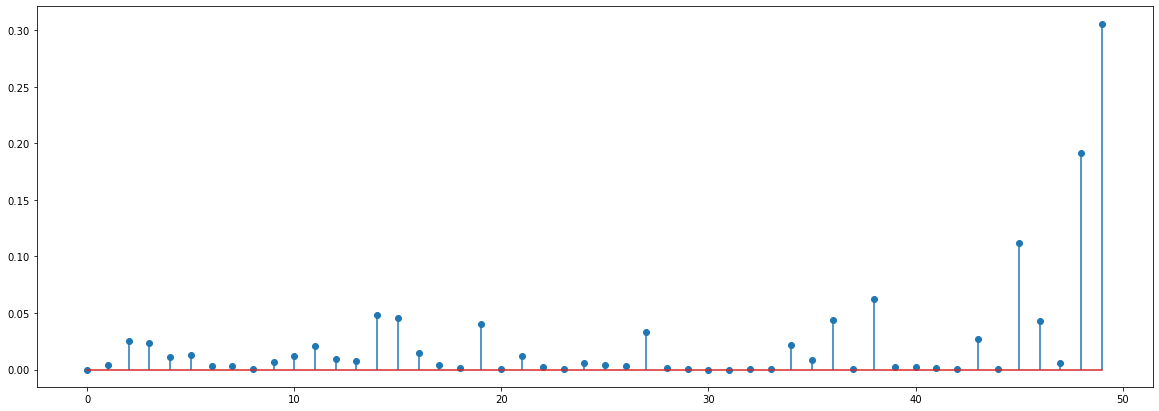

In [33]:
fig = plt.figure(figsize= (20,7))
plt.stem(np.arange(len(startup)),np.round(c,4))

In [34]:
np.argmax(c), np.max(c)

(49, 0.3060281954699332)

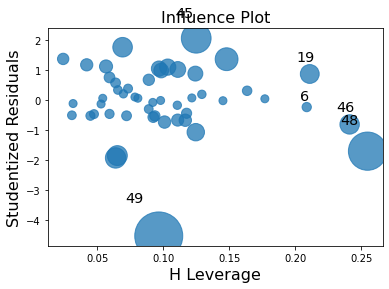

In [35]:
# influenceplot

from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model_1)
plt.show()

In [36]:
startup[startup.index.isin([49])]

,RD,Admin,Marketing,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [37]:
startup.head()

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [38]:
startup_2 = startup.drop(startup.index[[49]],axis=0).reset_index()


In [39]:
model_1_1=smf.ols('Profit~RD+Admin+Marketing+State',data=startup_2).fit()
model_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.6
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.45e-30
Time:                        13:50:53   Log-Likelihood:                -506.00
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.332e+04   5726.740      9.311      0.000    4.18e+04    6.49e+04
RD             0.7844      0.039     20.367      0.000       0.707       0.862
Admin         -0.0225      0.043     -0.522      0.604      -0.109       0.064
Marketing      0.0252      0.014      1.811      0.077      -0.003       0.053
State       -969.6140   1360.800     -0.713      0.480   -3712.127    1772.899
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.215
Skew:                           0.042   Prob(JB):                        0.898
Kurtosis:                       2.686   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# standardised model

std = StandardScaler()
startup_3=std.fit_transform(startup)
startup_3=pd.DataFrame(startup_3)

In [41]:
startup_3.head()

,0,1,2,3,4
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [42]:
startup_3.columns = ['Rd','Admin','Marekting','State','Profit']
startup_3.head()

,Rd,Admin,Marekting,State,Profit
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [43]:
model_1_std=smf.ols('Profit~Rd+Admin+Marekting+State',data=startup_3).fit()
model_1_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           8.51e-29
Time:                        13:50:53   Log-Likelihood:                 4.3223
No. Observations:                  50   AIC:                             1.355
Df Residuals:                      45   BIC:                             10.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.57e-14      1.000      -0.067       0.067
Rd             0.9176      0.052     17.609      0.000       0.813       1.023
Admin         -0.0186      0.036     -0.520      0.606      -0.091       0.054
Marekting      0.0826      0.050      1.637      0.109      -0.019       0.184
State         -0.0005      0.033     -0.014      0.989      -0.067       0.067
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model_rd_mark=smf.ols('Profit~RD+Marketing',data=startup_2).fit()
model_rd_mark.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           3.74e-33
Time:                        13:50:53   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RD             0.7754      0.035     22.136      0.000       0.705       0.846
Marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

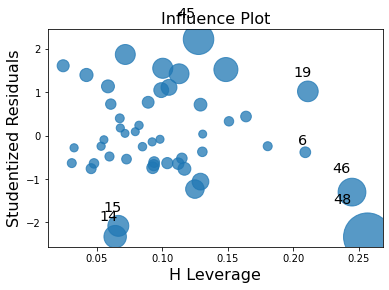

In [45]:
influence_plot(model_1_1)
plt.show()

In [46]:
startup_4=startup_2.drop(startup.index[[48]],axis=0).reset_index()

In [47]:
model_1_2=smf.ols('Profit~RD+Admin+Marketing+State',data=startup_4).fit()
model_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     277.7
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           4.18e-30
Time:                        13:50:54   Log-Likelihood:                -493.30
No. Observations:                  48   AIC:                             996.6
Df Residuals:                      43   BIC:                             1006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.927e+04   6021.622      9.843      0.000    4.71e+04    7.14e+04
RD             0.7898      0.037     21.480      0.000       0.716       0.864
Admin         -0.0626      0.045     -1.406      0.167      -0.152       0.027
Marketing      0.0171      0.014      1.245      0.220      -0.011       0.045
State       -326.7063   1325.527     -0.246      0.806   -2999.886    2346.473
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.517
Skew:                           0.081   Prob(JB):                        0.772
Kurtosis:                       2.518   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

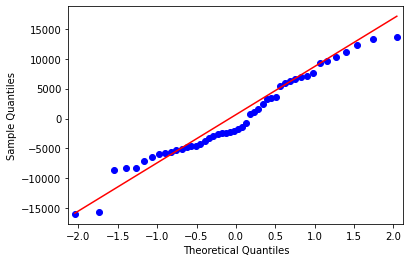

In [48]:
qqplot=sm.qqplot(model_1_2.resid,line='q')
plt.show()

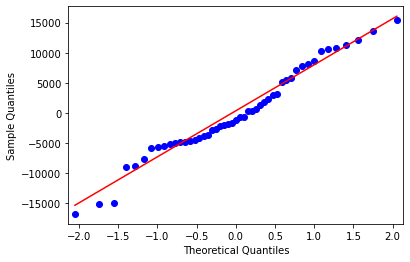

In [49]:
qqplot=sm.qqplot(model_1_1.resid,line='q')
plt.show()

In [50]:
startup_2.iloc[:,:5]

,index,RD,Admin,Marketing,State
0,0,165349.20,136897.80,471784.10,2
1,1,162597.70,151377.59,443898.53,0
2,2,153441.51,101145.55,407934.54,1
3,3,144372.41,118671.85,383199.62,2
4,4,142107.34,91391.77,366168.42,1
5,5,131876.90,99814.71,362861.36,2
6,6,134615.46,147198.87,127716.82,0
7,7,130298.13,145530.06,323876.68,1
8,8,120542.52,148718.95,311613.29,2
9,9,123334.88,108679.17,304981.62,0


In [51]:
# prediction

predict = model_1_1.predict(startup_2.iloc[:,:5])

In [52]:
predict.head()

0    189868.789012
1    188621.975818
2    180696.388117
3    171596.047134
4    170974.613858
dtype: float64

In [53]:
profit=startup_2["Profit"]
profit.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error as rmse
rmse(predict,profit)

54583828.771870546

In [55]:
predict_1 = model_1_2.predict(startup_2.iloc[:,:5])

In [56]:
rmse(predict_1,profit)

56706565.04967152

### by checking all the models,model_1_1 is good.

### Toyota Dataset

In [57]:
# import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [58]:
# load Toyota dataset
car = pd.read_csv("ToyotaCorolla.csv",encoding="latin-1")
car.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [59]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [60]:
columns_to_drop = ['Id','Model','Mfg_Month', 'Mfg_Year',
                   'Fuel_Type','Met_Color','Color','Automatic',
                   'Cylinders','Mfr_Guarantee', 'BOVAG_Guarantee','Guarantee_Period',
                   'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
                   'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
                   'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
                   'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
car.drop(columns_to_drop, axis = 1, inplace= True)
car.sample(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
51,15750,30,57086,97,1400,5,5,85,1110
1241,8950,71,82000,110,1600,5,5,85,1075
245,13500,39,56001,110,1600,5,5,85,1075
1162,7950,80,97548,86,1300,5,5,69,1035
1326,7400,80,65950,110,1600,5,5,85,1070


In [61]:
#check for missing values
car.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [62]:
car.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [63]:
car.shape

(1436, 9)

In [64]:
car=car.rename(columns={'Price':'P','Age_08_04':'A','Door':'D','Gears':'G','Quarterly_Tax':'Q','Weight':'W'})

In [65]:
car

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### Scatter plot

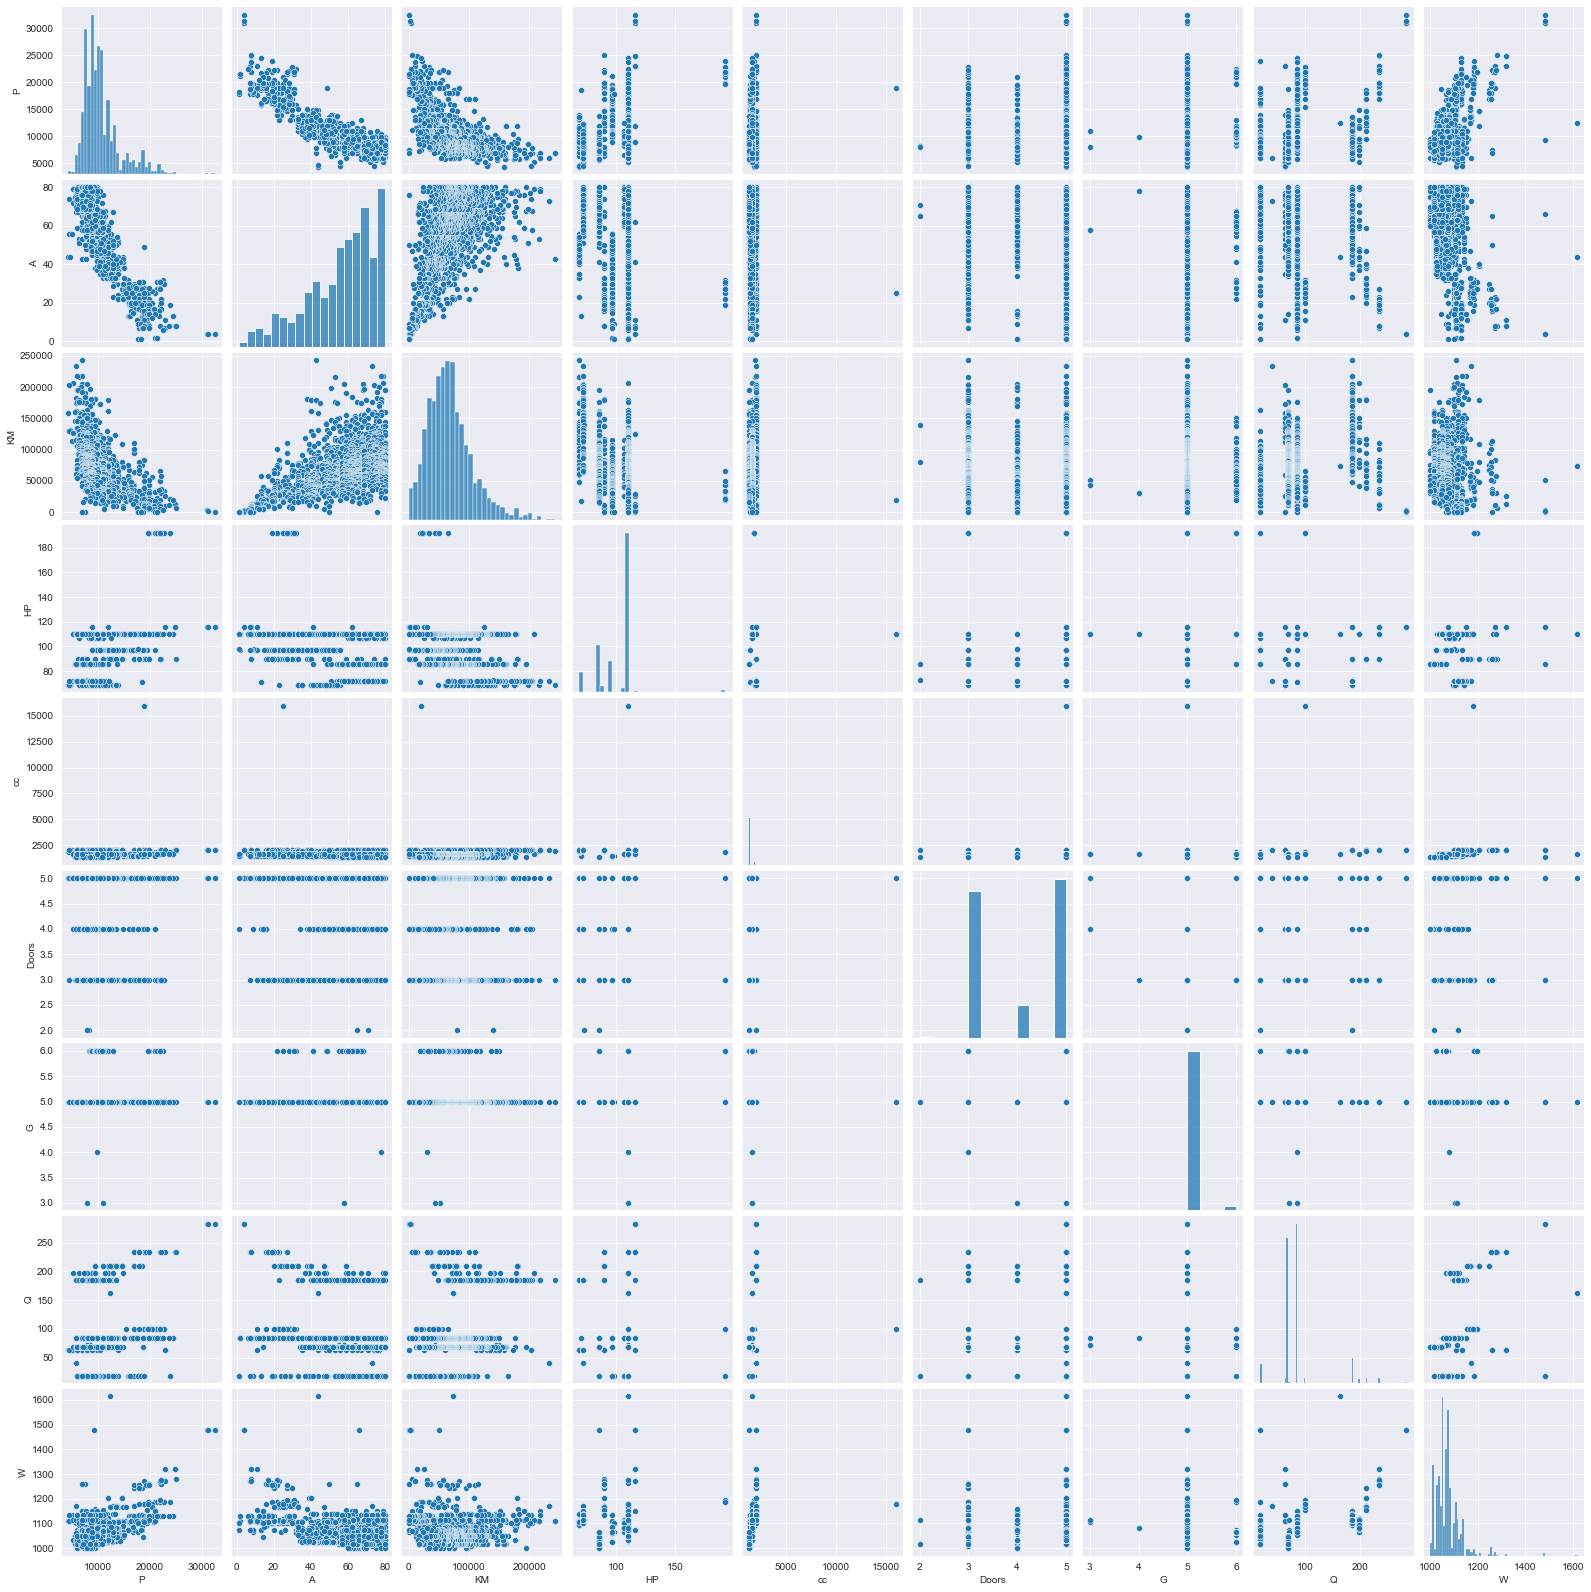

In [66]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(car)

### Preparing Model

In [67]:
car=car.rename(columns={'Price':'P','Age_08_04':'A','Door':'D','Gears':'G','Quarterly_Tax':'Q','Weight':'W'})

In [68]:
car

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [69]:
car.corr()

,P,A,KM,HP,cc,Doors,G,Q,W
P,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
A,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
G,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Q,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
W,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [70]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('P~A+KM+HP+cc+G+Q+W',data=car).fit()

In [71]:
#Coefficients
model.params

Intercept   -5575.140078
A            -121.658071
KM             -0.020819
HP             31.672841
cc             -0.121042
G             595.832420
Q               3.953059
W              16.947792
dtype: float64

In [72]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.954003
A           -46.528221
KM          -16.635958
HP           11.270379
cc           -1.344217
G             3.080822
Q             3.027187
W            16.400980
dtype: float64 
 Intercept     8.061841e-05
A            2.111306e-288
KM            6.123589e-57
HP            2.762121e-28
cc            1.790917e-01
G             2.103732e-03
Q             2.512611e-03
W             1.612185e-55
dtype: float64


In [73]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637625904386813, 0.8630947599996552)

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:51:42   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
A           -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM            -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP            31.6728      2.810     11.270      0.000      26.160      37.186
cc            -0.1210      0.090     -1.344      0.179      -0.298       0.056
G            595.8324    193.400      3.081      0.002     216.453     975.212
Q              3.9531      1.306      3.027      0.003       1.391       6.515
W             16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear regression¶

In [75]:
# Preparing model based only on cc
ml_cc=smf.ols('P~cc',data = car).fit()  
#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [76]:
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.55e-06
Time:                        13:51:43   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### P-value of cc is less than 0.05. so it is significant

In [77]:
#calculating VIF value

rsq_p = smf.ols('P~KM+HP+cc+G+Q+W',data=car).fit().rsquared  
vif_p = 1/(1-rsq_p) 

rsq_km = smf.ols('KM~HP+cc+G+Q+W+P',data=car).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('HP~cc+G+Q+W+P+KM',data=car).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_cc = smf.ols('cc~G+Q+W+P+KM+HP',data=car).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_g = smf.ols('G~Q+W+P+KM+HP+cc',data=car).fit().rsquared  
vif_g = 1/(1-rsq_g) 

rsq_q = smf.ols('Q~W+P+KM+HP+cc+G',data=car).fit().rsquared  
vif_q = 1/(1-rsq_q) 

rsq_w = smf.ols('W~P+KM+HP+cc+G+Q',data=car).fit().rsquared  
vif_w = 1/(1-rsq_w) 

# Storing vif values in a data frame
d1 = {'Variables':['P','KM','HP','cc','G','Q','W'],'VIF':[vif_p,vif_km,vif_hp,vif_cc,vif_g,vif_q,vif_w]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,P,2.917358
1,KM,2.095546
2,HP,1.445087
3,cc,1.164596
4,G,1.063180
5,Q,2.312528
6,W,2.775560


### Residual Analaysis

###  test for Normality of Residual (Q-Q plot)

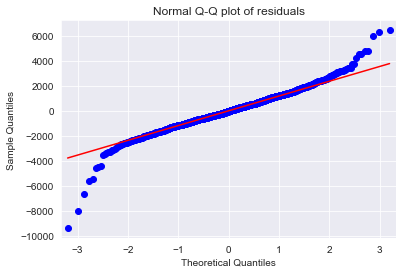

In [78]:
# Q-Q plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [79]:
list(np.where(model.resid>-4000))

[array([   0,    1,    2, ..., 1433, 1434, 1435], dtype=int64)]

### Residual Vs Regression

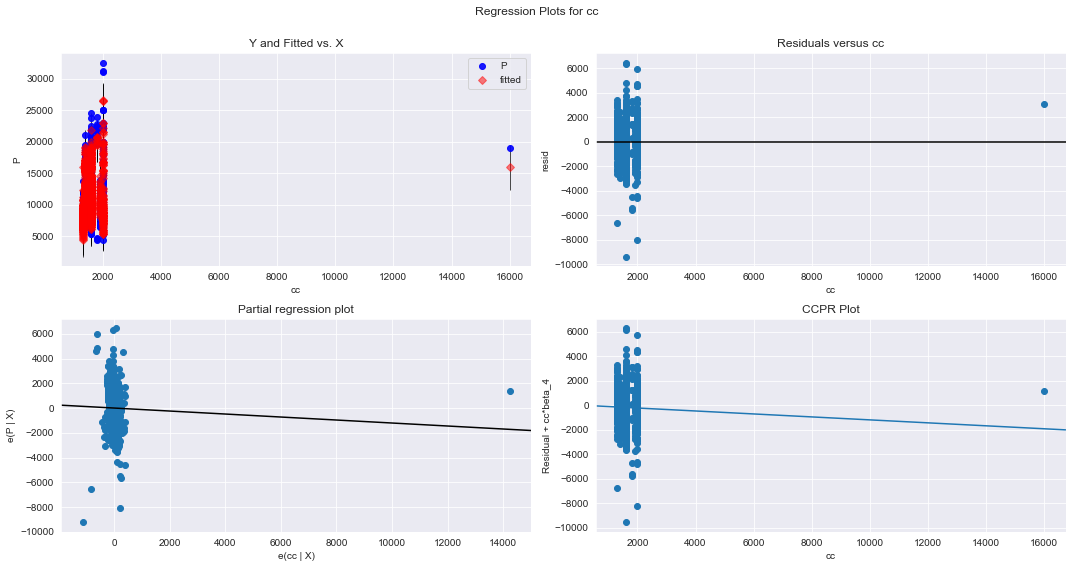

In [80]:
# Residual vs Regression
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

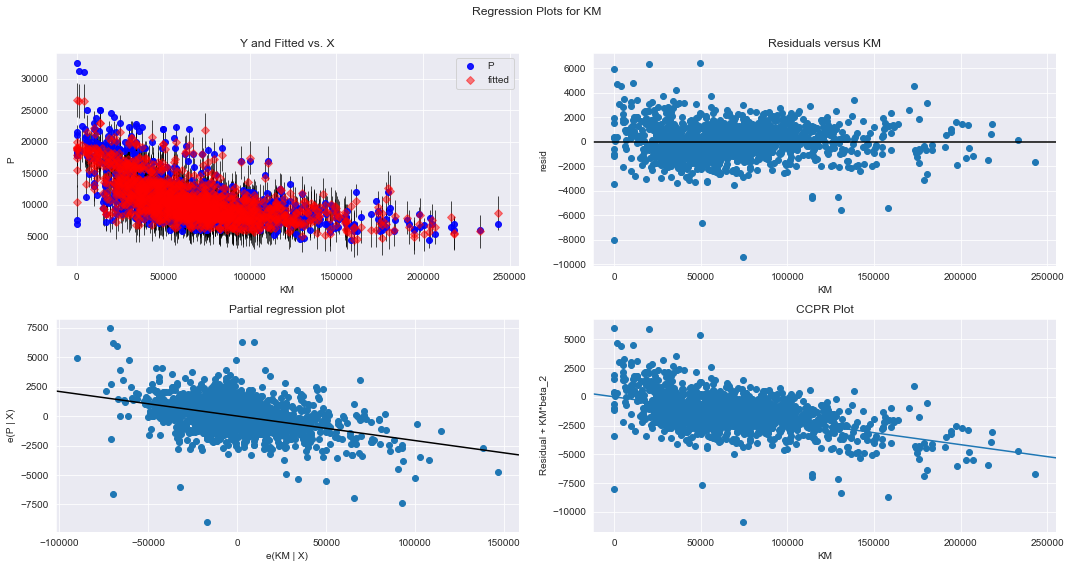

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

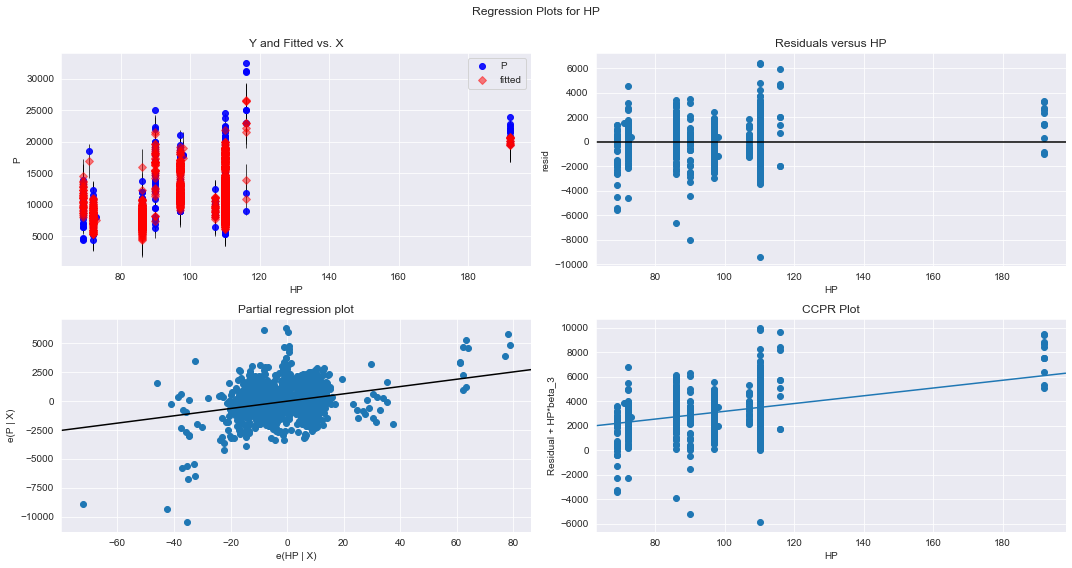

In [82]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

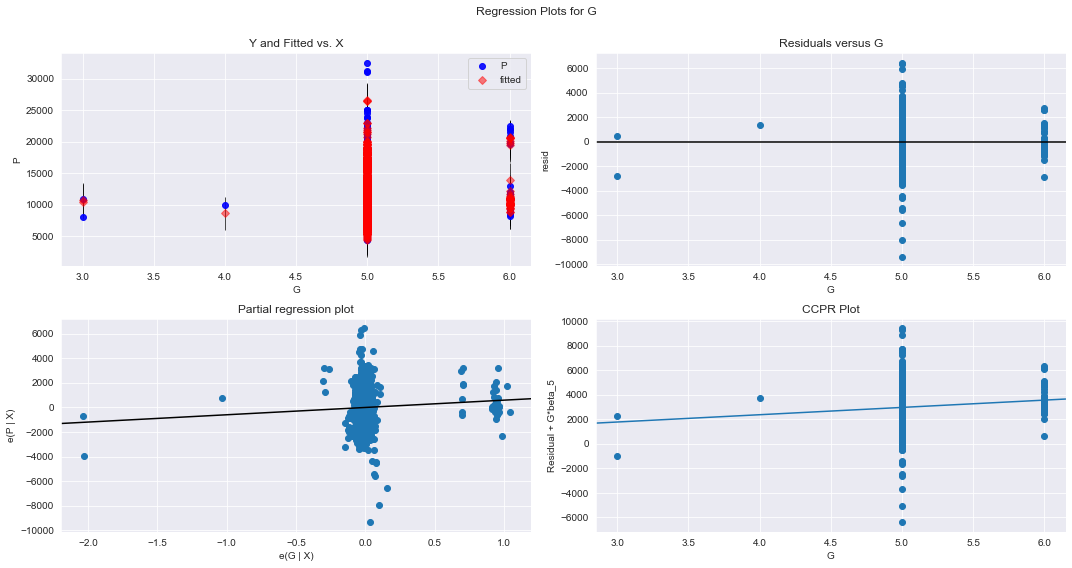

In [83]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "G", fig=fig)
plt.show()

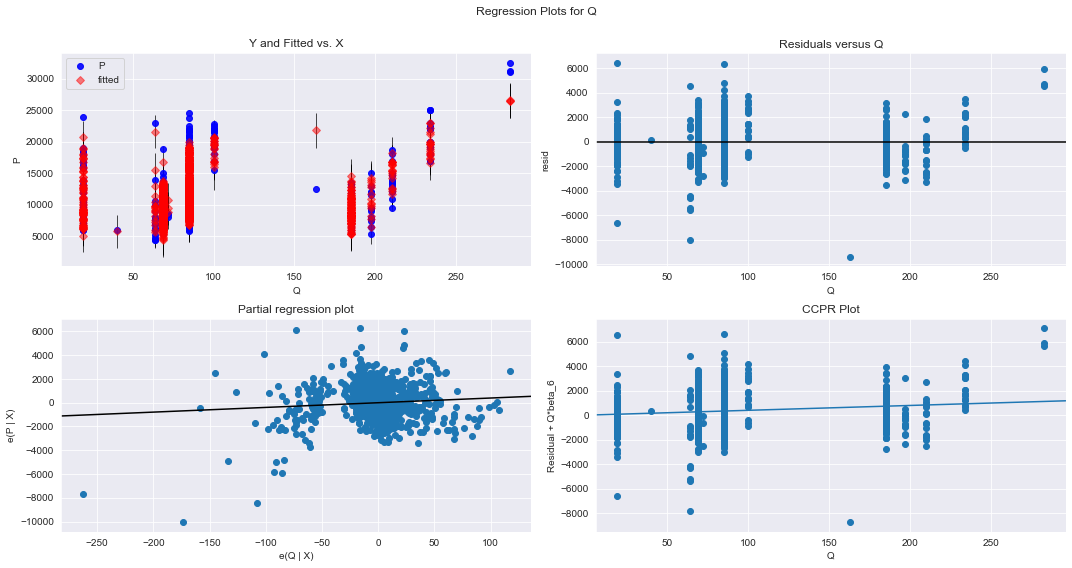

In [84]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Q", fig=fig)
plt.show()

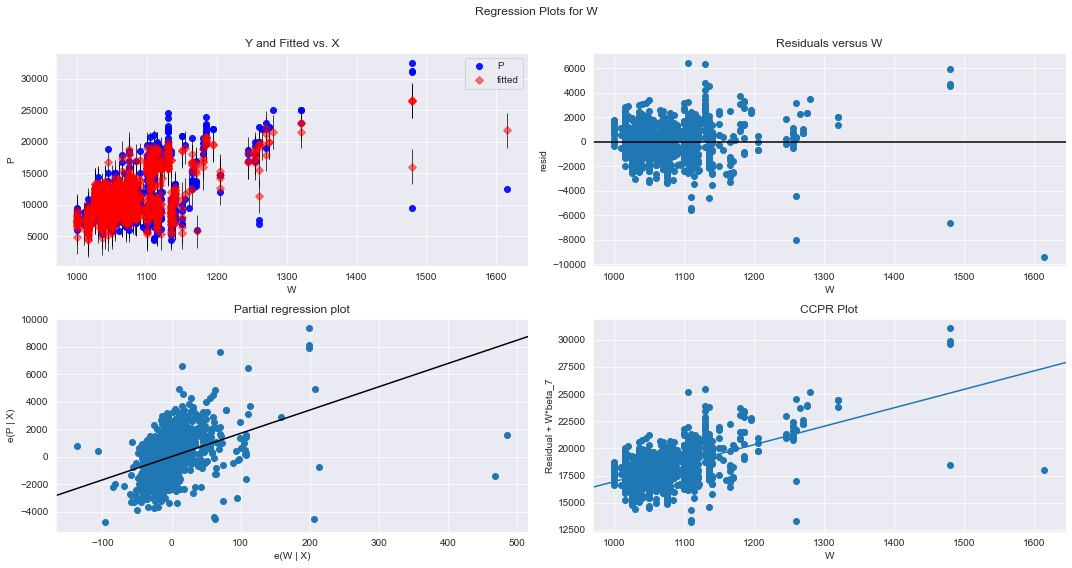

In [85]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "W", fig=fig)
plt.show()

### Cook's Distance for detecting outliers

In [86]:
# Cook's Distance/ outliers
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

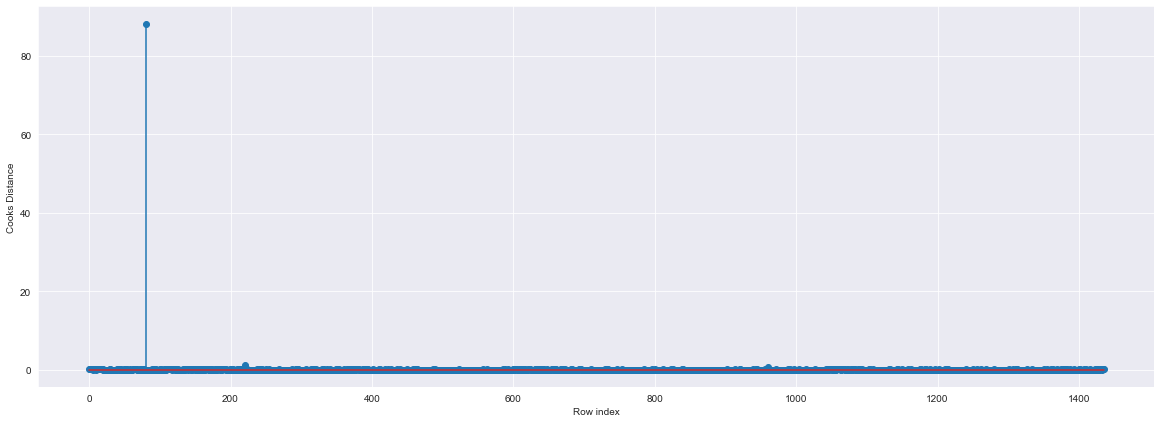

In [87]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [88]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 88.2598571029077)

### High Influence Points

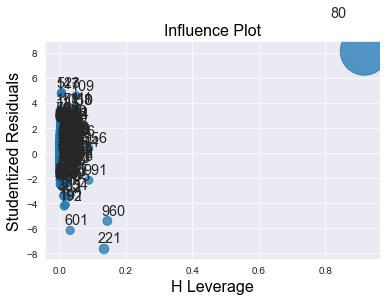

In [89]:
# High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [90]:
k = car.shape[1]
n = car.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [91]:
#From the above plot, it is evident that index data point 80 are high influencers so we can exclude that entire row¶

In [92]:
car[car.index.isin([80])]

,P,A,KM,HP,cc,Doors,G,Q,W
80,18950,25,20019,110,16000,5,5,100,1180


In [93]:
#See the differences in cc and other variable values
car

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### Improving Model

In [94]:
#Load the data
car_new = pd.read_csv("ToyotaCorolla.csv",encoding="latin-1")

In [95]:
columns_to_drop = ['Id','Model','Mfg_Month', 'Mfg_Year',
                   'Fuel_Type','Met_Color','Color','Automatic',
                   'Cylinders','Mfr_Guarantee', 'BOVAG_Guarantee','Guarantee_Period',
                   'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
                   'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
                   'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
                   'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
car_new.drop(columns_to_drop, axis = 1, inplace= True)
car_new.sample(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1151,7750,78,100487,110,1600,4,5,69,1035
210,13250,41,81106,69,1900,5,5,185,1140
873,9750,68,62292,110,1600,3,6,85,1065
616,9500,62,147636,72,2000,5,5,185,1135
487,8950,54,61000,69,2000,5,5,185,1140


In [96]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=car_new.drop(car_new.index[[80]],axis=0).reset_index()

In [97]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [98]:
car1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [99]:
car1.shape

(1435, 9)

In [100]:
car1=car1.rename(columns={'Price':'P','Age_08_04':'A','Door':'D','Gears':'G','Quarterly_Tax':'Q','Weight':'W'})

### Build Model

In [101]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_ml_cc= smf.ols('P~KM+HP+cc+G+Q+W',data = car1).fit()

In [102]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.6667985618833168, 26027.083330644426)

In [103]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.6667985618833168, 26027.083330644426)

In [104]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.6667985618833168, 26027.083330644426)

### cook's distance

In [105]:
model_influence_cc = final_ml_cc.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

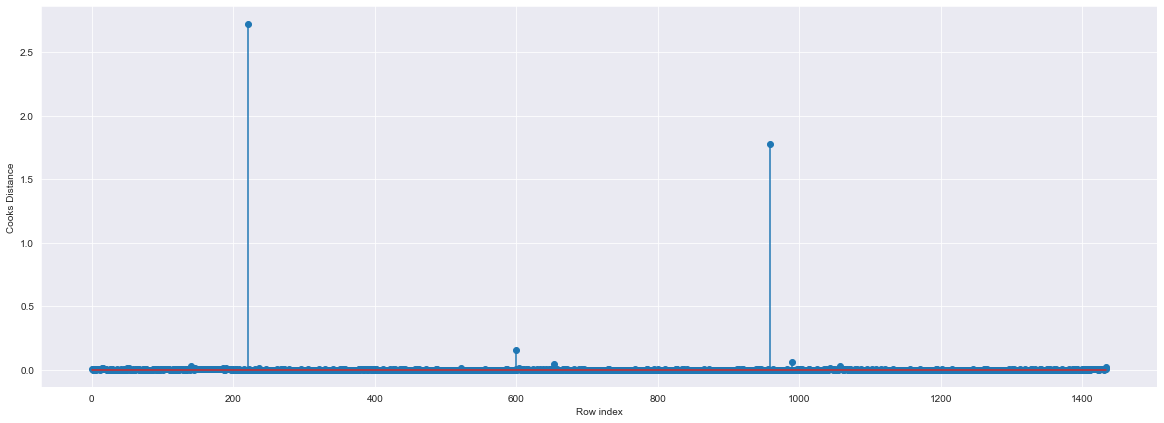

In [106]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

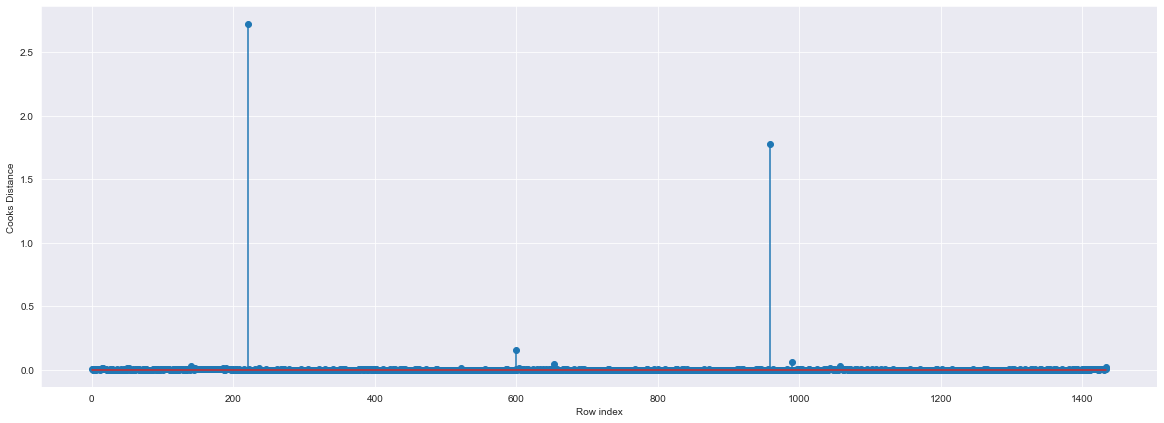

In [107]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');


In [108]:
#index of the data points where c is more than .5
(np.argmax(c_cc),np.max(c_cc))

(220, 2.7240128906478027)

In [109]:
#Drop 220 observations
car2=car1.drop(car1.index[[220]],axis=0)

In [110]:
car2

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [111]:
car2.shape

(1434, 9)

In [112]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [113]:
car4=car3.drop(['index'],axis=1)

In [114]:
car4

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [115]:
#Build the model on the new data
final_ml_cc= smf.ols('P~KM+HP+Q+W+G',data = car4).fit()

In [116]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.6737950701593258, 25977.29687195057)

In [117]:
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     589.9
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:52:05   Log-Likelihood:                -12983.
No. Observations:                1434   AIC:                         2.598e+04
Df Residuals:                    1428   BIC:                         2.601e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.381e+04   2081.532    -16.243      0.000   -3.79e+04   -2.97e+04
KM            -0.0519      0.002    -32.095      0.000      -0.055      -0.049
HP            22.9540      4.333      5.298      0.000      14.455      31.453
Q              4.5467      2.037      2.232      0.026       0.551       8.543
W             38.7540      1.552     24.977      0.000      35.710      41.798
G            759.8790    298.642      2.544      0.011     174.054    1345.704
==============================================================================
Omnibus:                      196.562   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.352
Skew:                          -0.387   Prob(JB):                         0.00
Kurtosis:                       7.915   Cond. No.                     2.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
#Again check for influencers
model_influence_cc = final_ml_cc.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

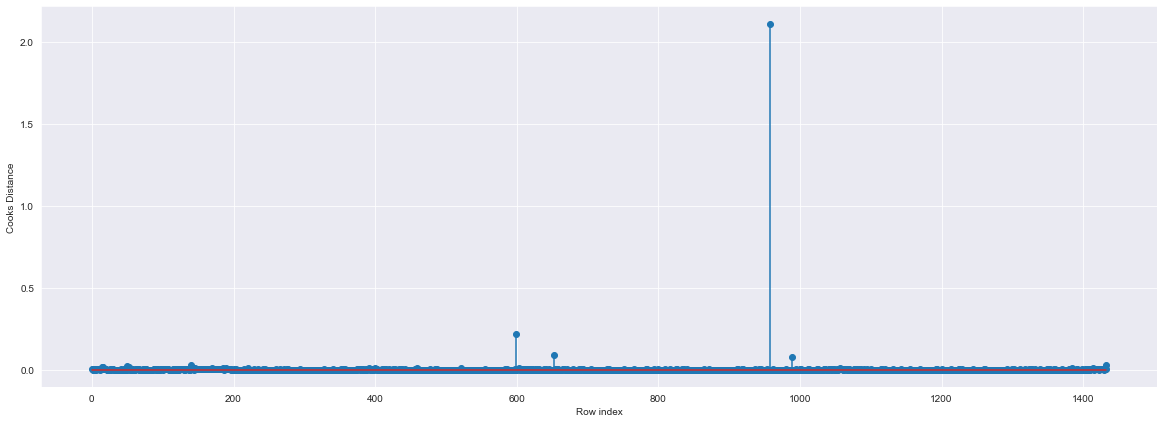

In [119]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');


In [120]:
#index of the data points where c is more than .5
(np.argmax(c_cc),np.max(c_cc))

(958, 2.112992498785254)

### Since value >1, do again till we get <1 diagonal process

In [121]:

#Drop 958 observations
car5=car4.drop(car1.index[[958]],axis=0)

In [122]:
car5

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [123]:
#Reset the index and re arrange the row values
car6=car5.reset_index()

In [124]:
car7=car6.drop(['index'],axis=1)

In [125]:
car7

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [126]:
#Build the model on the new data
final_ml_cc= smf.ols('P~KM+HP+Q+W+G',data = car7).fit()

In [127]:
(final_ml_cc.rsquared,final_ml_cc.aic)


(0.6923347538870235, 25876.204137586403)

In [128]:
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     642.2
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:52:06   Log-Likelihood:                -12932.
No. Observations:                1433   AIC:                         2.588e+04
Df Residuals:                    1427   BIC:                         2.591e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.879e+04   2092.060    -18.541      0.000   -4.29e+04   -3.47e+04
KM            -0.0510      0.002    -32.401      0.000      -0.054      -0.048
HP            16.1999      4.272      3.792      0.000       7.821      24.579
Q             -1.2506      2.075     -0.603      0.547      -5.321       2.820
W             44.1835      1.617     27.327      0.000      41.012      47.355
G            819.5451    290.191      2.824      0.005     250.299    1388.791
==============================================================================
Omnibus:                      101.748   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.469
Skew:                          -0.176   Prob(JB):                     3.35e-94
Kurtosis:                       5.662   Cond. No.                     3.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
#Again check for influencers
model_influence_cc = final_ml_cc.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

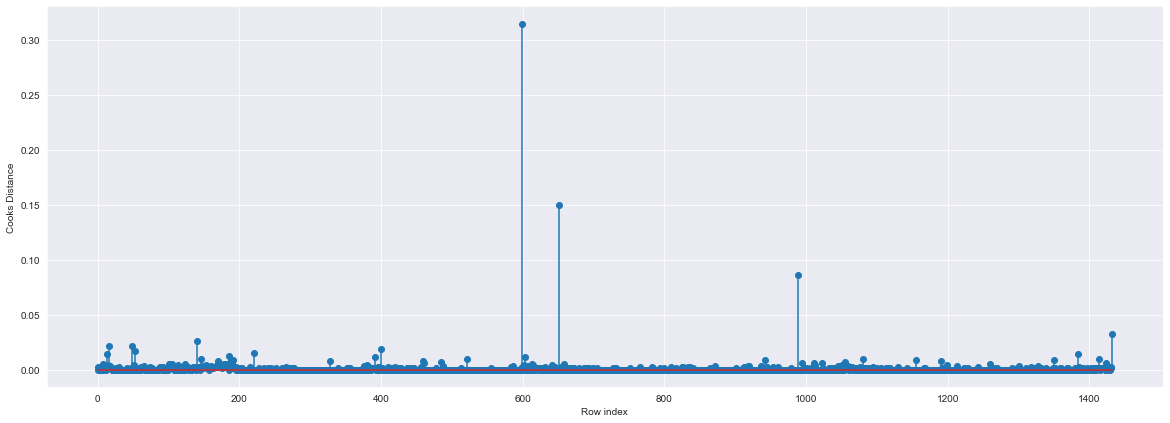

In [130]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car7)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

### Since the value is <1, we can stop the diagnostic process and finalize the model

In [131]:
#Check the accuracy of the mode
final_ml_cc= smf.ols('P~KM+HP+Q+G+W',data = car7).fit()

In [132]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.6923347538870235, 25876.204137586403)

In [133]:
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     642.2
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:52:07   Log-Likelihood:                -12932.
No. Observations:                1433   AIC:                         2.588e+04
Df Residuals:                    1427   BIC:                         2.591e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.879e+04   2092.060    -18.541      0.000   -4.29e+04   -3.47e+04
KM            -0.0510      0.002    -32.401      0.000      -0.054      -0.048
HP            16.1999      4.272      3.792      0.000       7.821      24.579
Q             -1.2506      2.075     -0.603      0.547      -5.321       2.820
G            819.5451    290.191      2.824      0.005     250.299    1388.791
W             44.1835      1.617     27.327      0.000      41.012      47.355
==============================================================================
Omnibus:                      101.748   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.469
Skew:                          -0.176   Prob(JB):                     3.35e-94
Kurtosis:                       5.662   Cond. No.                     3.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### predicting for new datapoint

In [134]:
#New data for prediction
new_data=pd.DataFrame({"A":25,"KM":45000,"HP":90,"cc":2000,"D":3,"G":5,"Q":210,"W":1165},index=[1])

In [135]:
final_ml_cc.predict(new_data)

1    15685.849449
dtype: float64

In [136]:
car_new=car_new.rename(columns={'Price':'P','Age_08_04':'A','Door':'D','Gears':'G','Quarterly_Tax':'Q','Weight':'W'})

In [137]:
final_ml_cc.predict(car_new.iloc[0:9,])

0    15584.644137
1    14262.197484
2    15853.454822
3    15532.971334
4    16238.003042
5    15091.417181
6    16692.335947
7    17646.448262
8    19648.749860
dtype: float64

In [138]:
pred_y = final_ml_cc.predict(car_new)

In [139]:
pred_y

0       15584.644137
1       14262.197484
2       15853.454822
3       15532.971334
4       16238.003042
            ...     
1431    10857.957976
1432    10494.803890
1433    10595.907283
1434    10601.003220
1435    16288.480060
Length: 1436, dtype: float64

### The Prediction for ToyotaCorlla_dataset is predicted and the random value of 'Age_08_04' =25,'Door'=3,'Gears'=5,'cc'=2000,'Quarterly_Tax'=210,'Weight'=1165,KM=45000 is given randomly and Price is obtained 15685.84 .
R-Squared value of the given ToyotaCorlla_dataset model is 69%. which means it's ok model. it's b